In [1]:
from openai import OpenAI
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np

from Utils.embedding import plot_results

load_dotenv()

client = OpenAI()
embeddings = OpenAIEmbeddings(model="text-embedding-3-large", chunk_size=1)
test_text_embeddings = [
    "UNA",
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht FTX?",
    "Für was steht SG1?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht PYT?",
    "Für was steht LIN?",
]


results = []
loader = PyPDFLoader(
    "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",
    extract_images=False,
)
pages = loader.load_and_split()
faiss_index = FAISS.from_documents(pages, embeddings)

<>:31: SyntaxWarning: invalid escape sequence '\M'
<>:31: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_14564\551219012.py:31: SyntaxWarning: invalid escape sequence '\M'
  "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",


Erzeuge aus der liste "input_texts" embeddings.

In [2]:
np.array(faiss_index.similarity_search_with_score(test_text_embeddings[3], 1))

array([[Document(page_content="Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  \nSt = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  \n Seite:17 /96  \n \n Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  \n  \n 0030 6   DTM   D          11  Liefer- / Leistungsdatum  \n  \n Standard  Implementierung  \nBez  Name  St  Format   St  Format  Beispiel  Anwendung / Bemerkung  \nDTM       DTM   \nC507  Datum/Uhrzeit/Zeitspanne  M   M    \n2005  Datums- oder Uhrzeits- oder  \nZeitspannen-Funktion, Qualifier  M an..3   M an..3 +1   1 Abschluss der Serviceleistung,  \n          tatsächlicher  Zeitpunkt  \n          (Datum/Uhrzeit)  \n2380  Datum oder Uhrzeit oder  \nZeitspanne, Wert  C an..35   R n..8 :20160420  Liefer- / Leistungsdatum  \n2379  Datums- oder Uhrzeit- oder  \nZeitspannen-Format, Code  C an..3   R an..3 :102'   102  CCYYMMDD  \n Anmerkungen  Das Lieferdatum auf Kop

Erstelle eine Matrix mit jedem Embedding, aber mit verändertem K-Parameter. So kannst du die Unterschiede besser analysieren.

In [3]:
results = np.zeros((10, 10))
results_embedding = []
for i in range(10):
    results[i, :] = np.array(
        faiss_index.similarity_search_with_score(test_text_embeddings[i], 10)
    )[:, 1]
    results_embedding.append(faiss_index.similarity_search(test_text_embeddings[i], 10))

Visualisierung der Scores zu den einzelnen Fragen.

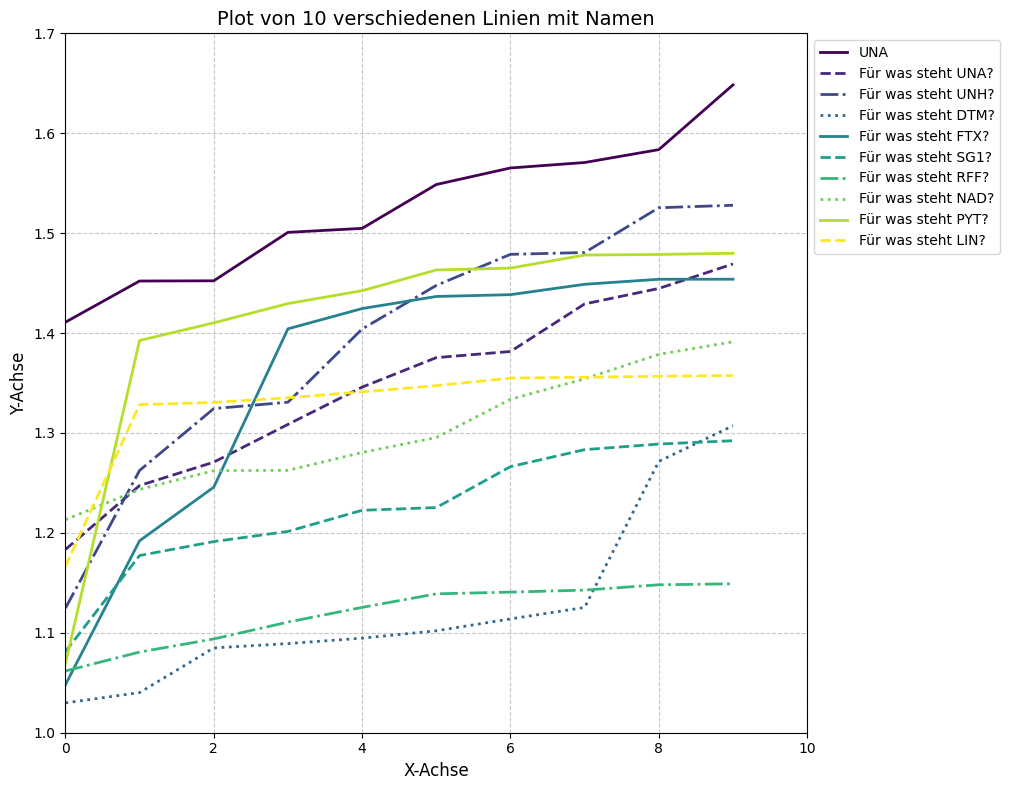

In [4]:
plot_results(results, test_text_embeddings)

Im Folgenden werden die besten Ergebnisse für die Frage „Was bedeutet UNA?” präsentiert. Es zeigt sich, dass für den besten Score die richtigen Informationen ausgewählt wurden, wie aus dem PDF-Auszug ersichtlich ist. Der zweit- und drittbeste Score sind jedoch falsch und alle nachfolgenden auch.

In [5]:
print("1.------------------------------------------------")
print(results_embedding[1][0].page_content)
print("2.------------------------------------------------")
print(results_embedding[1][1].page_content)
print("3.------------------------------------------------")
print(results_embedding[1][3].page_content)

1.------------------------------------------------
Segmente  
 
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
  Seite:12 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0000 1   UNA   O 1 0  Trennzeichen-Vorgabe  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  
UNA       UNA  
UNA1  Gruppendatenelement-  
Trennzeichen  M an1   M an1 : Doppelpunkt  
UNA2  Segment-Bezeichner- und  
Datenelement -Trennzeichen  M an1   M an1 + Pluszeichen  
UNA3  Dezimalzeichen  M an1   M an1  . Punkt  
UNA4  Freigabezeichen  M an1   M an1  ? Fragezeichen  
UNA5  Reserviert für spätere  
Verwendung  M an1   M an1  Leerzeichen  
UNA6  Segment -Endezeichen  M an1   M an1  ' Hochkomma  
 Beispiel  UNA:+.? '
2.------------------------------------------------
Bez = Objekt-B

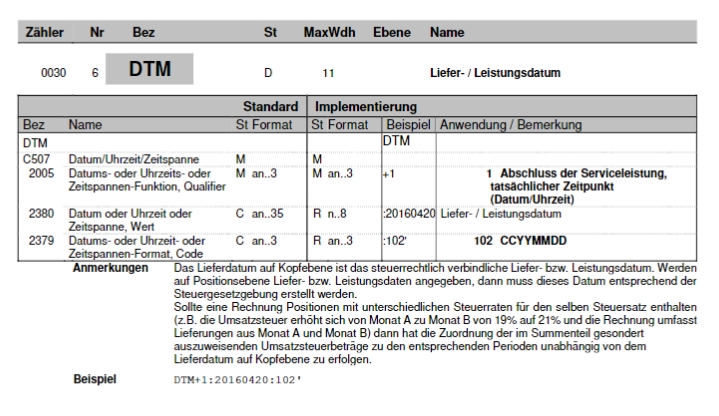

Im Folgenden werden die besten Ergebnisse für die Frage „Was bedeutet UNA?” präsentiert. Das Ergebnis zeigt, dass für den besten Score die richtigen Informationen ausgewählt wurden, wie auch bei dem Beispiel davor. Alle anderen Einträge sind ebenfalls falsch.

In [ ]:

print("1.------------------------------------------------")
print(results_embedding[0][0].page_content)
print("2.------------------------------------------------")
print(results_embedding[0][1].page_content)
print("3.------------------------------------------------")
print(results_embedding[0][2].page_content)

Segmente  
 
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
  Seite:12 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0000 1   UNA   O 1 0  Trennzeichen-Vorgabe  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  
UNA       UNA  
UNA1  Gruppendatenelement-  
Trennzeichen  M an1   M an1 : Doppelpunkt  
UNA2  Segment-Bezeichner- und  
Datenelement -Trennzeichen  M an1   M an1 + Pluszeichen  
UNA3  Dezimalzeichen  M an1   M an1  . Punkt  
UNA4  Freigabezeichen  M an1   M an1  ? Fragezeichen  
UNA5  Reserviert für spätere  
Verwendung  M an1   M an1  Leerzeichen  
UNA6  Segment -Endezeichen  M an1   M an1  ' Hochkomma  
 Beispiel  UNA:+.? '
1.------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, M

Die Exploration hat ergeben, dass bei einem einzigen Dokument der k-Wert, der die Anzahl der Ergebnisse repräsentiert, auf 1 gesetzt werden sollte. Bei dieser Art von Dokumenten ist in der Regel nur ein sinnvoller Datenpunkt enthalten, sodass andernfalls falsche Informationen für die Weiterverarbeitung verwendet werden.